# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import plotly.offline as py
from yellowbrick.features import FeatureImportances

from loguru import logger

In [2]:
fifa = pd.read_csv("fifa.csv")

In [3]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [4]:
# Sua análise começa aqui.
fifa.head()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [5]:
# Identificando o tipo de cada variável:
fifa.dtypes

Age                  int64
Overall              int64
Potential            int64
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
SlidingTackle      float64
GKDiving           float64
GKHandling         float64
GKKicking          float64
GKPositioning      float64
GKReflexes         float64
d

In [6]:
# Verificando se existem valores nulos no Dataset.
if fifa.isnull().sum().sort_values(ascending=False).any() != 0:
    print(f'Existe valores missing no dataset? {True}')
else:
    print(f'Existe valores missing no dataset? {False}')

Existe valores missing no dataset? True


In [7]:
# Removendo os valores missing:
fifa.dropna(inplace=True)

In [8]:
# Separando os dados em componentes de input e output:
X = fifa.drop(['Overall'], axis=1)
y = fifa['Overall']

## **Redução de Dimensionalidade: Principal Component Analysis (PCA)**

A análise de componentes principais **(PCA)** é um método para extração das variáveis importantes a partir de um grande conjunto de variáveis disponíveis em um conjunto de dados. Esta técnica permite extrair um número pequeno de conjuntos dimensionais a partir de um dataset altamente dimensional. Com menos variáveis a visualização também se torna muito mais significativa.

In [9]:
# Aplicando o PCA no nosso conjunto de dados:
pca = PCA(n_components=3)
pcamodel = pca.fit_transform(fifa)

In [10]:
# Gráfico do PCA:
fig = go.Figure()
fig = go.Figure(data=[go.Scatter3d(x=pcamodel[:, 0],
                    y=pcamodel[:, 1],
                    z=pcamodel[:, 2],
                    marker=dict(opacity=1,
                    reversescale=True,
                    colorscale='Blues',
                    color='#228B22',
                    size=2.5),
                    line=dict (width=0.09),
                    mode='markers')])

# Layout:
fig.update_layout(scene=dict(xaxis=dict( title="PCA1"),
                                yaxis=dict( title="PCA2"),
                                zaxis=dict(title="PCA3")),
                                template='plotly_dark',
                                title="PCA",
                                font=dict(family="Courier New, monospace",
                                          size=12, 
                                          color="#ffffff"),
                                          autosize=False,
                                          width=700,
                                          height=400)
                                          

# Plot:
fig.show()

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [11]:
def q1():
    # PCA:
    pca = PCA().fit(fifa)

    # Fração da variância:
    return float(round(pca.explained_variance_ratio_[0],3))
q1()

0.565

O primeiro componente principal é a combinação linear dos atributos com máxima variância e determina a direção em que há mais alta variabilidade nos dados. Quanto maior a variabilidade capturada no primeiro componente principal, mais informação será capturada pelo componente.

In [12]:
# PCA:
pca = PCA().fit(fifa)

# Gráfico:
fig = go.Figure()
fig.add_trace(go.Scatter(y=(np.cumsum(pca.explained_variance_ratio_)),
                         mode='lines', line=dict(color="#8B0000",width = 4)))
    
# Layout:  
fig.update_layout(showlegend=False,
                  title="Variância explicada pelo primeiro componente principal",
                  xaxis_title="Número de componentes",
                  yaxis_title="Variância explicada (%)",
                  template='plotly_dark',
                  font=dict(family="Courier New, monospace",
                            size=12, 
                            color="#ffffff"),

                  annotations=[dict(x=0,
                                    y=0.565,
                                    xref="x",
                                    yref="y",
                                    text="fraction of variance",
                                    showarrow=True,
                                    arrowhead=2,
                                    arrowsize=2,
                                    arrowcolor="#FF8C00",
                                    ax=100,
                                    ay=-1,
                                    font=dict(
                                    family="Courier New, monospace",
                                    size=12,
                                    color="#ffffff"))])
                                    
# Plot:
fig.show()

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [13]:
def q2():
    # PCA:
    pca = PCA(.95).fit_transform(fifa)

    # Número de componentes:
    return pca.shape[1]
q2()

15

A análise de componentes principais é associada a ideia de redução de massa de dados, com menor perda possível da informação. O objetivo é sumarizar os dados que contém muitas variáveis (p) por um conjunto menor de variáveis (k) compostas, derivadas a partir do conjunto original. Os primeiros k componentes contém a maior quantidade de variação dos dados.

In [14]:
# Gráfico:

fig = go.Figure()
fig.add_trace(go.Scatter(y=(np.cumsum(pca.explained_variance_ratio_)),
                         mode='lines', line=dict(color="#8B0000",width = 4)))
    

# Layout:  
fig.update_layout(showlegend=False,
                  title="Número de componentes principais que explicam 95% da variância",
                  xaxis_title="Número de componentes",
                  yaxis_title="Variância explicada (%)",
                  template='plotly_dark',
                  font=dict(family="monospace",
                            size=10, color="#ffffff"),

                  annotations=[dict(x=15,
                                    y=0.95,
                                    xref="x",
                                    yref="y",
                                    text="95% of the total variance",
                                    showarrow=True,
                                    arrowhead=6,
                                    arrowsize=2,
                                    arrowcolor="#FF8C00",
                                    ax=120,
                                    ay=-1,
                                    font=dict(
                                    family="Courier New, monospace",
                                    size=12,
                                    color="#ffffff"))])

# Plot:                                    
fig.show()

Nesse caso, para obter 95% da variação explicada, preciso de 15 componentes principais.

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [15]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

In [16]:
def q3():
    # PCA:
    pca = PCA(n_components=2).fit(fifa)

    # Coordenadas (primeiro e segundo componentes principais):
    return tuple([round(x,3) for x in pca.components_.dot(x)])
q3()

(186.556, -6.592)

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

O **Recursive Feature Elimination (RFE)** é uma técnica para seleção de atributos. Basicamente ele remove recursivamente os atributos e constrói o modelo com os atributos remanescentes. Essa técnica utiliza a acurácia do modelo para identificar os atributos que mais contribuem para prever a variável alvo.

Para a solução do exercício utilizei a técnica de eliminação recursiva de atributos com um algortimo de Regressão linear para selecionar as 5 melhores variáveis preditoras.

Antes de resolver o exercício vamos visualizar graficamente quais os atributos mais importantes. 
A lib [Yellowbrick](https://www.scikit-yb.org/en/latest/api/model_selection/importances.html) possui o atributo FeatureImportances para classificar e plotar as importâncias relativas.

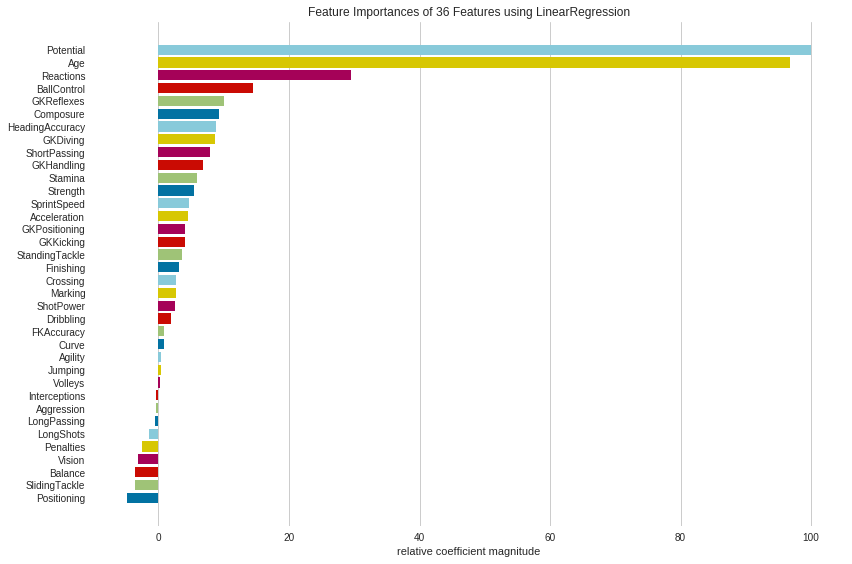

In [17]:
# Gráfico :
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

# Layout:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Plot:
viz = FeatureImportances(LinearRegression(), ax=ax)
viz.fit(X, y)
viz.poof();

In [18]:
def q4():
    # Criação do modelo:
    modelo = LinearRegression()
    
    # RFE:
    rfe = RFE(modelo,5).fit(X,y)
    return list(X.loc[:, rfe.support_].columns)
q4()

['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes']

Esse exercício aborda a etapa de Feature Selection, onde selecionamos os atributos(variáveis) que serão melhores candidatas a variáveis preditoras. Essa técnica nos ajuda a reduzir o overfiting (quando o algoritmo aprende demais), aumenta a acurácia do modelo e reduz o tempo de treinamento.